<a href="https://colab.research.google.com/github/bryaanabraham/Deep-Fake-AI/blob/main/Weights_deduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from PIL import Image
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
fake_frames_dir = '/content/drive/MyDrive/Frames/frames_fake'
original_frames_dir = '/content/drive/MyDrive/Frames/frames_original'

In [63]:
def get_image_files(directory, extension="jpg"):
    image_files = []
    pattern = os.path.join(directory, f"*.{extension}")
    image_files.extend(glob.glob(pattern))
    return image_files

In [64]:
fake_images = get_image_files(fake_frames_dir)
original_images = get_image_files(original_frames_dir)

In [65]:
fake_images.sort()
original_images.sort()

In [89]:
fake_image = Image.open(fake_images[0])
fake_image_array = np.array(fake_image)
df_fake = pd.DataFrame(fake_image_array.reshape(-1, 3), columns=['R', 'G', 'B'])

original_image = Image.open(original_images[0])
original_image_array = np.array(original_image)
df_original = pd.DataFrame(original_image_array.reshape(-1, 3), columns=['R', 'G', 'B'])

for i in range(1,len(fake_images)):
    fake_image = Image.open(fake_images[i])
    fake_image_array = np.array(fake_image)
    df_fake_temp = pd.DataFrame(fake_image_array.reshape(-1, 3), columns=['R', 'G', 'B'])
    df_fake += df_fake_temp

    original_image = Image.open(original_images[i])
    original_image_array = np.array(original_image)
    df_original_temp = pd.DataFrame(original_image_array.reshape(-1, 3), columns=['R', 'G', 'B'])
    df_original += df_original_temp

df_difference = (df_original - df_fake) / len(fake_images)

In [90]:
weight_array = df_difference.to_numpy().reshape(640, 360, 3).astype(np.uint8)

In [104]:
fake_image = Image.open(fake_images[0])
fake_image_array = np.array(fake_image)

In [105]:
original_image = Image.open(original_images[0])
original_image_array = np.array(original_image)

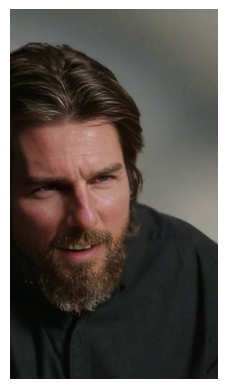

In [106]:
plt.imshow(fake_image_array)
plt.axis('off')
plt.show()

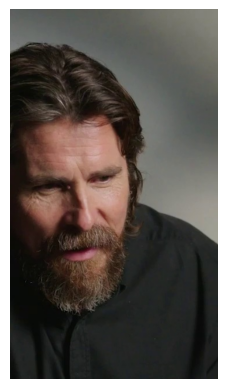

In [107]:
plt.imshow(original_image_array)
plt.axis('off')
plt.show()

In [108]:
reversed_array = fake_image_array + weight_array

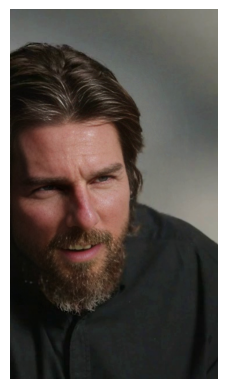

In [109]:
plt.imshow(reversed_array)
plt.axis('off')
plt.show()